### 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargamos el dataset
data = pd.read_csv("ML_cars.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#En la columna CarName podemos observar que los valores almacenan tanto el nombre de la marca como el nombre del modelo del automóvil.
#Entonces tenemos que limpiar esa característica.
#Podemos separar los nombres de las marcas de la columna CarName.
Nombre_Marca = data["CarName"].apply(lambda x: x.split(" ")[0])
data.insert(2,"CompanyName",Nombre_Marca)

# Eliminamos la columna CarName
data.drop(columns=["CarName"],inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
data.drop(columns=['car_ID'], axis=1, inplace=True)

In [20]:
data.shape

(205, 25)

In [21]:
# Mostrar información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CompanyName       205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [22]:
# Mostrar estadísticas resumidas
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [23]:
# Comprobando valores nulos
data.isnull().sum()

symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [26]:
# Mostrar nombres de columnas
data.Company= data.CompanyName.str.lower()
data.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [27]:
#Chequeamos valores unicos en la columna CompanyName
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [28]:
#Corregimos marcas mal escritas
data.CompanyName.replace('alfa-romero', 'alfa-romeo', inplace=True)
data.CompanyName.replace('maxda', 'mazda', inplace=True)
data.CompanyName.replace('porcshce','porsche', inplace=True)
data.CompanyName.replace('toyouta', 'toyota', inplace=True)
data.CompanyName.replace('vokswagen', 'volkswagen', inplace=True)
data.CompanyName.replace('vw','volkswagen', inplace=True)
data.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Es momento de visualizar los datos

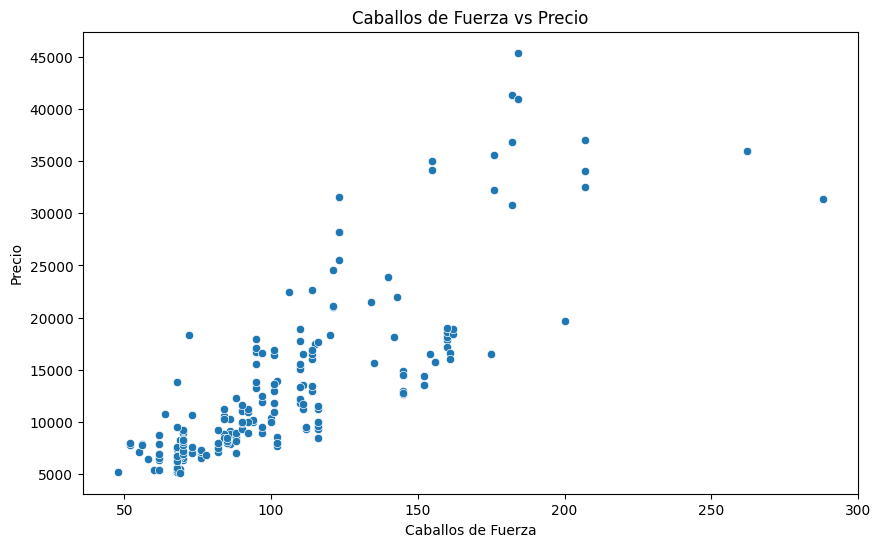

In [30]:
# Gráfico de dispersión: relación entre 'horsepower'' y 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='horsepower', y='price')
plt.title('Caballos de Fuerza vs Precio')
plt.xlabel('Caballos de Fuerza')
plt.ylabel('Precio')
plt.show()

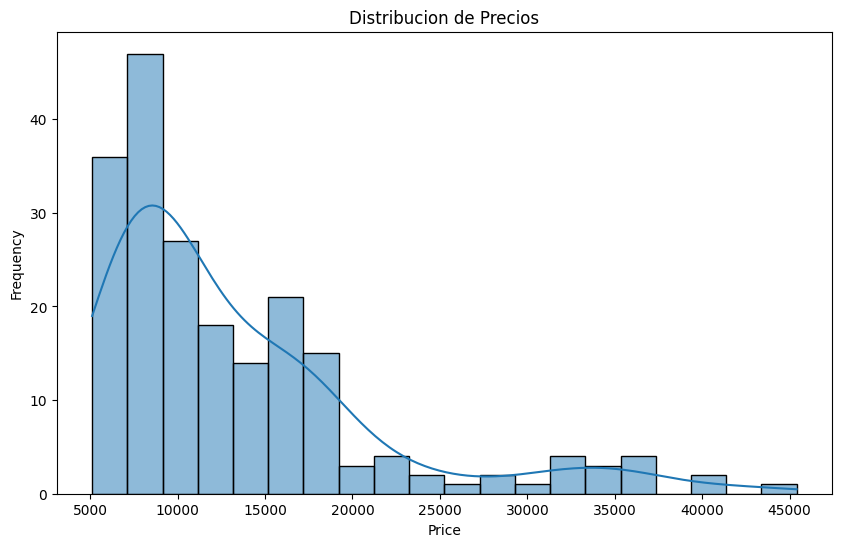

In [31]:
# Histograma: Distribución de los precios.
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='price', bins=20, kde=True)
plt.title('Distribucion de Precios')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

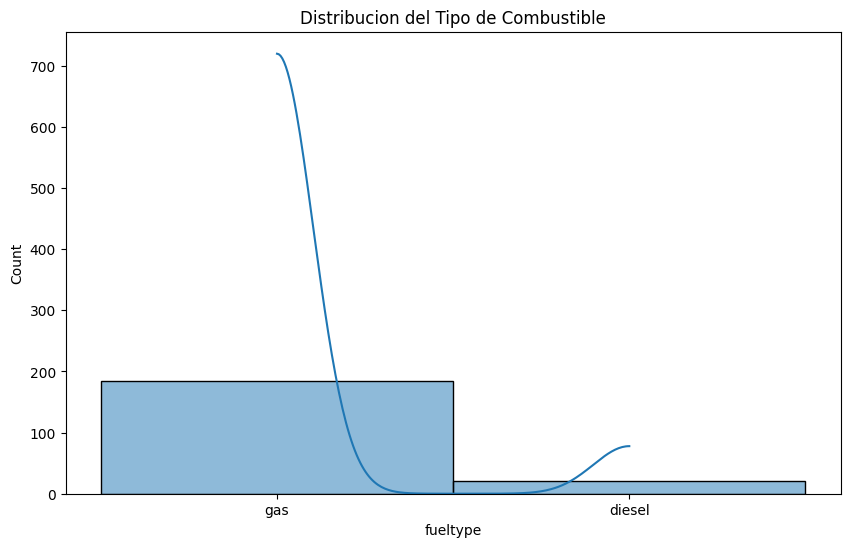

In [32]:
#Histograma: Distribución del tipo de combustible
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="fueltype", bins=20, kde=True)
plt.title("Distribucion del Tipo de Combustible")
plt.show()

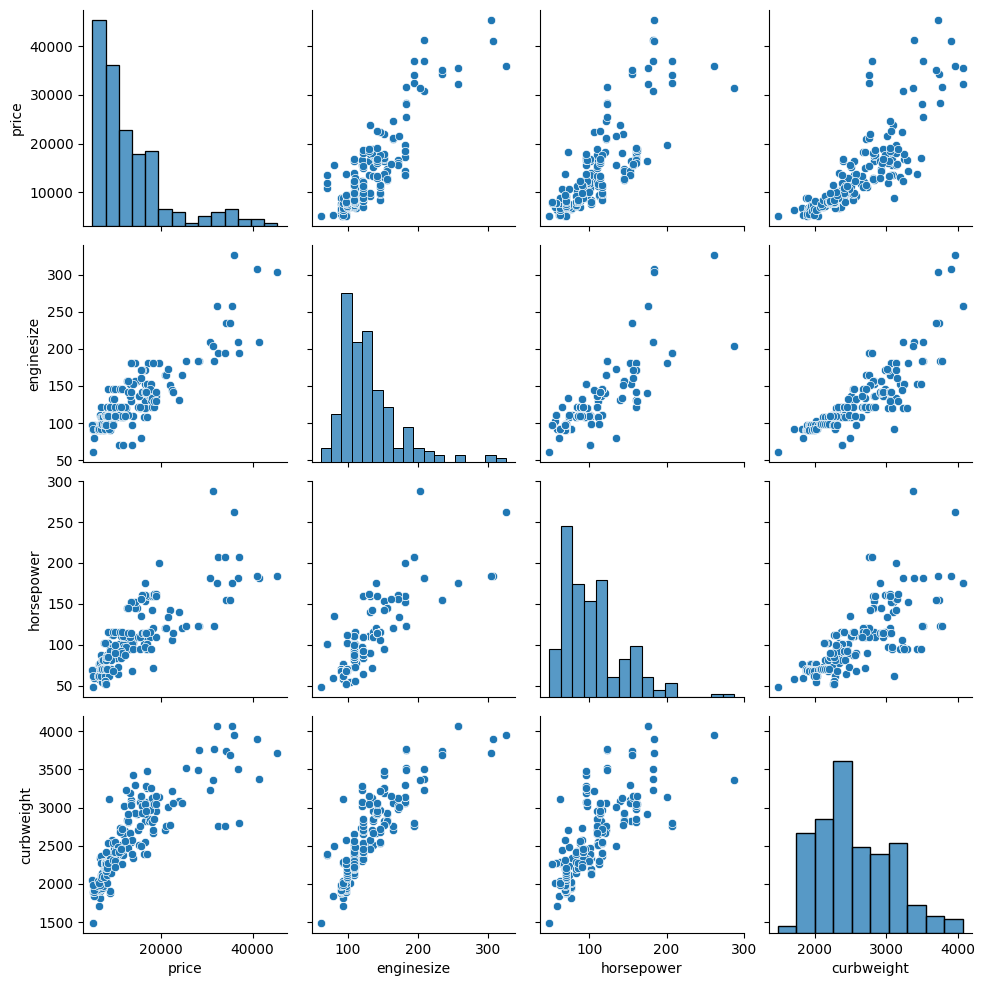

In [33]:
import warnings

# Suprimir la advertencia del usuario
warnings.filterwarnings("ignore", category=UserWarning)

#trama de pares
sns.pairplot(data[['price','enginesize','horsepower','curbweight']])
plt.show()

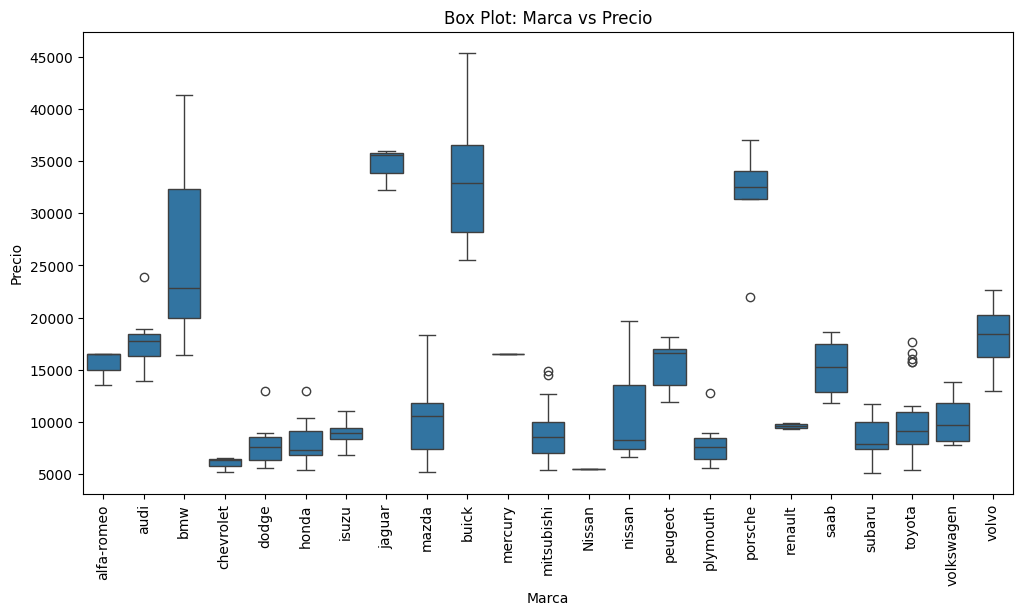

In [36]:
#Marca vs Precio

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='CompanyName', y='price')
plt.xticks(rotation=90)
plt.title('Box Plot: Marca vs Precio')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.show()

### Preprocesamiento de Datos

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = data.select_dtypes(include='object').columns

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [40]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Selección y entrenamiento de modelo (regresión lineal)

In [41]:
from sklearn.linear_model import LinearRegression

Model = LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

### Evaluación del modelo (regresión lineal)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_absolute_error

y_pred = Model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 7560449.1953152865
Mean Absolute Error: 2055.0019189840805
Root Mean Squared Error: 2749.6271011384956
R-squared: 0.9109547979597896


### Predicción de precios para automóviles nuevos

In [43]:
new_car_features = [4000, 0, 2, 3, 0, 96.0, 172.0, 65.4, 2221, 120, 4, 3.46, 3.19, 9.0, 68, 5500, 31, 38, 0, 0, 0, 0, 0, 0, 0]
new_car_price = Model.predict([new_car_features])
print("Precio Estimado:", new_car_price[0])

ValueError: X has 25 features, but LinearRegression is expecting 24 features as input.